In [1]:
import torch
from torchvision import datasets,transforms
%matplotlib inline

!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
%config InlineBackend.figure_format='retina'
import helper
#a transform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
#downlading and loadng the training dataset
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#downloading and loading the testing dataset
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

--2019-01-17 11:39:19--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... failed: Name or service not known.
wget: unable to resolve host address ‘raw.githubusercontent.com’


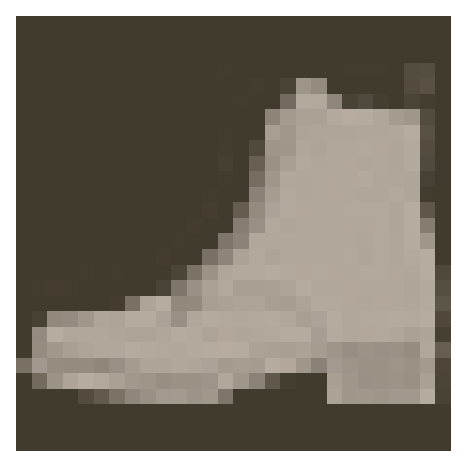

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

BUILDING THE NETWORK

In [3]:
from torch import nn,optim#nn help us buld the network,optim help us get optimizers
import torch.nn.functional as F#would help us use functions like softmax
#%matpotlib inline
%config InlineBackend.figure_format='retina'
#import helper

In [4]:
#Defining network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,256)#hidden layer1
        self.fc2=nn.Linear(256,128)#hidden layer3
        self.fc3=nn.Linear(128,64)#hidden layer4
        self.fc4=nn.Linear(64,10)#output layer with 10 units
        
        
    def forward(self,x):
        #x must be flattened
        x=x.view(x.shape[0],-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.log_softmax(self.fc4(x),dim=1)
        
        return x

TRAINING THE NETWORK

In [5]:
#Creating the network,defining the criterion and optmizer
model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)#optimizer same like gradient descent but it has momentum
                                                #which speeds up training


In [6]:
#training the network
epochs=5
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        logps=model(images)
        loss=criterion(logps,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        running_loss+=loss.item()
    else:
        print(f"Training loss:{running_loss}")
        
    
    

Training loss:485.2863021045923
Training loss:366.8739634901285
Training loss:335.2606804892421
Training loss:310.0467913597822
Training loss:299.3002808317542


In [ ]:
%matplotlib inline
%config InlineBackened.figure_format='retina'
import helper
dataiter=iter(testloader)
images,labels=dataiter.next()
img=images[1]
#calculating the class probabi;ities(softmax ) for img
ps=torch.exp(model(img))

#ploting the images and probabilities
helper.view_classify(img,ps,version='Fashion')


In [8]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [9]:
print(ps.shape)

torch.Size([64, 10])


    VALIDATION
    -the target of validation is to evaluate the model's performance on data that is not part of 
    training set
    With the probabilities, we can get the most likely class using the ps.topk method which returns the  
    kk  highest values

In [10]:
top_p,top_class=ps.topk(1,dim=1)
print(top_class[:10,:])


tensor([[7],
        [7],
        [6],
        [7],
        [7],
        [6],
        [6],
        [6],
        [6],
        [6]])


In [11]:
equals = top_class == labels.view(*top_class.shape)

In [12]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 12.5%


In [13]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs =6 
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/6..  Training Loss: 0.511..  Test Loss: 0.437..  Test Accuracy: 0.842
Epoch: 2/6..  Training Loss: 0.393..  Test Loss: 0.458..  Test Accuracy: 0.841
Epoch: 3/6..  Training Loss: 0.353..  Test Loss: 0.399..  Test Accuracy: 0.856
Epoch: 4/6..  Training Loss: 0.334..  Test Loss: 0.408..  Test Accuracy: 0.860
Epoch: 5/6..  Training Loss: 0.318..  Test Loss: 0.370..  Test Accuracy: 0.870
Epoch: 6/6..  Training Loss: 0.303..  Test Loss: 0.388..  Test Accuracy: 0.862


In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

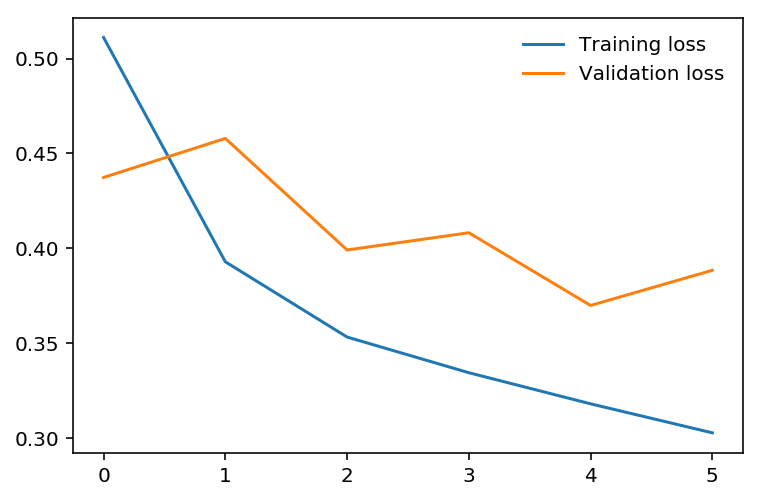

In [15]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)#the model is overfitting
#we minimize itby regularization,i.e droup out

In [16]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [17]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.598..  Test Loss: 0.490..  Test Accuracy: 0.818
Epoch: 2/30..  Training Loss: 0.479..  Test Loss: 0.425..  Test Accuracy: 0.844
Epoch: 3/30..  Training Loss: 0.442..  Test Loss: 0.425..  Test Accuracy: 0.843
Epoch: 4/30..  Training Loss: 0.432..  Test Loss: 0.414..  Test Accuracy: 0.854
Epoch: 5/30..  Training Loss: 0.420..  Test Loss: 0.433..  Test Accuracy: 0.839
Epoch: 6/30..  Training Loss: 0.412..  Test Loss: 0.395..  Test Accuracy: 0.861
Epoch: 7/30..  Training Loss: 0.400..  Test Loss: 0.421..  Test Accuracy: 0.853
Epoch: 8/30..  Training Loss: 0.398..  Test Loss: 0.402..  Test Accuracy: 0.864
Epoch: 9/30..  Training Loss: 0.388..  Test Loss: 0.409..  Test Accuracy: 0.862
Epoch: 10/30..  Training Loss: 0.391..  Test Loss: 0.397..  Test Accuracy: 0.864
Epoch: 11/30..  Training Loss: 0.392..  Test Loss: 0.380..  Test Accuracy: 0.866
Epoch: 12/30..  Training Loss: 0.382..  Test Loss: 0.386..  Test Accuracy: 0.868
Epoch: 13/30..  Training Loss: 0.376.

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

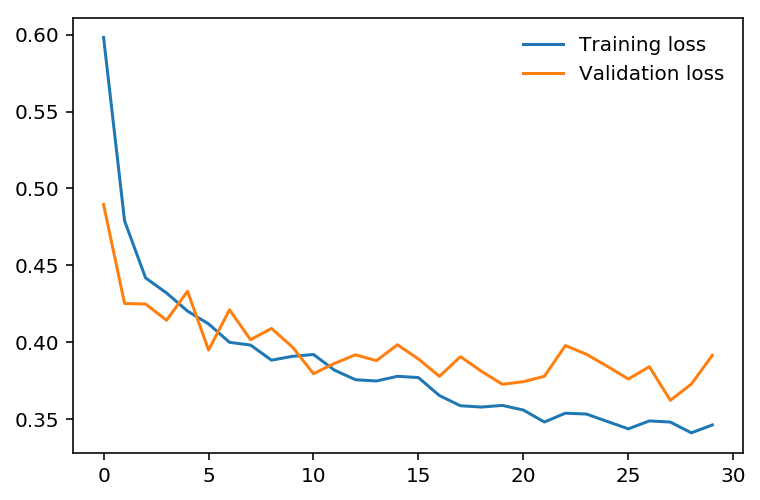

In [19]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

inference

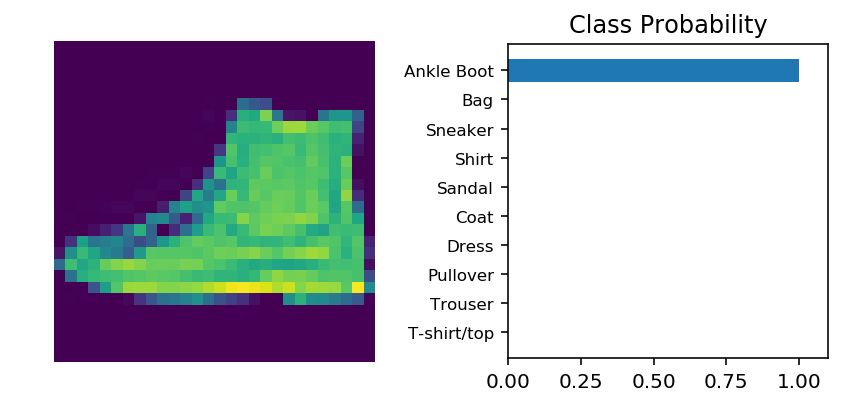

In [20]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities

helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

# Saving and Loading Models


In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

ModuleNotFoundError: No module named 'fc_model'